In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [3]:
unzip_data("cat_crawling_img.zip")

In [4]:
walk_through_dir("cat_crawling_img")

cat_crawling_img 디렉토리에는 2개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
cat_crawling_img\test 디렉토리에는 4개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
cat_crawling_img\test\british shorthair 디렉토리에는 0개의 디렉토리가 존재하고 24개의 파일이 존재합니다.
cat_crawling_img\test\munchkin 디렉토리에는 0개의 디렉토리가 존재하고 14개의 파일이 존재합니다.
cat_crawling_img\test\ragdoll 디렉토리에는 0개의 디렉토리가 존재하고 25개의 파일이 존재합니다.
cat_crawling_img\test\sphynx 디렉토리에는 0개의 디렉토리가 존재하고 17개의 파일이 존재합니다.
cat_crawling_img\train 디렉토리에는 4개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
cat_crawling_img\train\british shorthair 디렉토리에는 0개의 디렉토리가 존재하고 80개의 파일이 존재합니다.
cat_crawling_img\train\munchkin 디렉토리에는 0개의 디렉토리가 존재하고 79개의 파일이 존재합니다.
cat_crawling_img\train\ragdoll 디렉토리에는 0개의 디렉토리가 존재하고 79개의 파일이 존재합니다.
cat_crawling_img\train\sphynx 디렉토리에는 0개의 디렉토리가 존재하고 80개의 파일이 존재합니다.


In [5]:
train_dir = "cat_crawling_img/train/"
test_dir = "cat_crawling_img/test/"

In [6]:
IMG_SIZE = (224, 224)

train_data_cat = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode = "categorical",
    image_size = IMG_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode = "categorical",
    image_size = IMG_SIZE,
    shuffle = False
)

Found 318 files belonging to 4 classes.
Found 80 files belonging to 4 classes.


In [7]:
checkpoint_path = "cat_crawling_img_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only = True,
    monitor = "val_accuracy",
    save_best_only = True
)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
], name = "data_augmentation")

In [9]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = (224, 224, 3), name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)
outputs = layers.Dense(
    len(train_data_cat.class_names),
    activation = "softmax",
    name = "output_layer"
)(x)
model = tf.keras.Model(inputs, outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 5,124
Non-trainable

In [11]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history = model.fit(
    train_data_cat,
    epochs = 5,
    validation_data = test_data,
    callbacks = [checkpoint_callback]
)

Epoch 1/5
10/10 [==============================] - 13s 952ms/step - loss: 1.3796 - accuracy: 0.3365 - val_loss: 1.1352 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 8s 822ms/step - loss: 1.0523 - accuracy: 0.5818 - val_loss: 0.8778 - val_accuracy: 0.7000
Epoch 3/5
10/10 [==============================] - 8s 746ms/step - loss: 0.8594 - accuracy: 0.6981 - val_loss: 0.7524 - val_accuracy: 0.7500
Epoch 4/5
10/10 [==============================] - 9s 846ms/step - loss: 0.7686 - accuracy: 0.7233 - val_loss: 0.6608 - val_accuracy: 0.7875
Epoch 5/5
10/10 [==============================] - 8s 780ms/step - loss: 0.6931 - accuracy: 0.7484 - val_loss: 0.6076 - val_accuracy: 0.7750


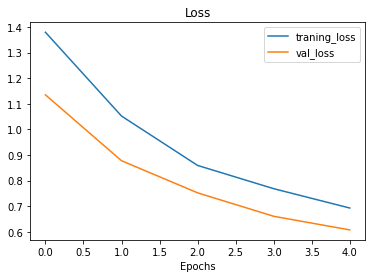

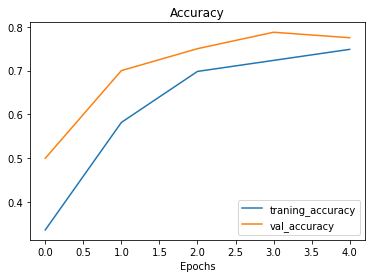

In [12]:
plot_loss_curves(history)

In [13]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
    layer.trainable = False

In [14]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [15]:
for layer in model.layers:
    print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [16]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [17]:
fine_tune_epochs = 10

history_fine_tune = model.fit(
    train_data_cat,
    epochs = fine_tune_epochs,
    validation_data = test_data,
    initial_epoch = history.epoch[-1]
)

Epoch 5/10
10/10 [==============================] - 12s 858ms/step - loss: 0.7025 - accuracy: 0.7296 - val_loss: 0.4600 - val_accuracy: 0.7750
Epoch 6/10
10/10 [==============================] - 9s 861ms/step - loss: 0.3426 - accuracy: 0.8491 - val_loss: 0.3765 - val_accuracy: 0.8125
Epoch 7/10
10/10 [==============================] - 8s 739ms/step - loss: 0.2247 - accuracy: 0.9214 - val_loss: 0.4386 - val_accuracy: 0.8625
Epoch 8/10
10/10 [==============================] - 9s 836ms/step - loss: 0.1604 - accuracy: 0.9591 - val_loss: 0.2893 - val_accuracy: 0.8500
Epoch 9/10
10/10 [==============================] - 8s 737ms/step - loss: 0.2032 - accuracy: 0.9371 - val_loss: 0.2712 - val_accuracy: 0.8500
Epoch 10/10
10/10 [==============================] - 9s 846ms/step - loss: 0.0844 - accuracy: 0.9717 - val_loss: 0.2636 - val_accuracy: 0.8875


5
11
[0.33647799491882324, 0.5817610025405884, 0.698113203048706, 0.7232704162597656, 0.74842768907547, 0.7295597195625305, 0.849056601524353, 0.9213836193084717, 0.9591194987297058, 0.9371069073677063, 0.9716981053352356]


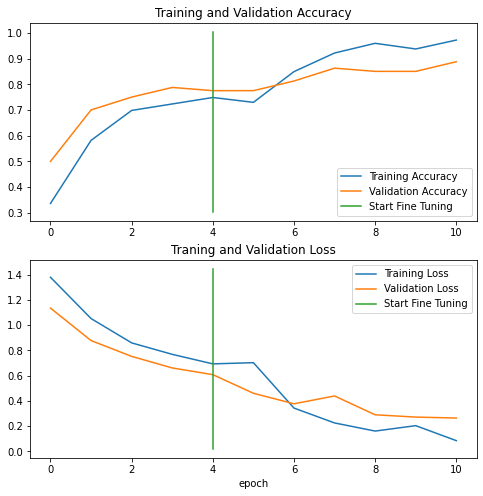

In [18]:
compare_historys(
    original_history= history,
    new_history = history_fine_tune,
    initial_epochs= 5
)

In [19]:
model.save("project_model_crawling_img.h5")

c:\20211209\venv_211209\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
